## Dependency

In [12]:
import sys
sys.path.append('..')
import pandas as pd
import os
from src.visualization.plotgraph import show_plot_class_distribution, show_plot_class_distribution_pie
from hydra.core.global_hydra import GlobalHydra
import hydra

## Load config

In [13]:
# Clear existing Hydra instance
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

# Re-initialize
with hydra.initialize(config_path="../config", version_base=None):
    cfg = hydra.compose(config_name="ner-config.yaml", return_hydra_config=True)
    global_cfg = hydra.compose(config_name="config.yaml")

## Paths

In [14]:
ROOT_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(ROOT_PATH, "data", "processed")


## Constants

In [ ]:
CLASS_COLUMN = "Image"
IMAGE_COUNT_COLUMN = "Count"

## Load Data

In [ ]:
text_df = pd.read_csv(os.path.join(DATA_PATH, cfg.paths.data_file))

In [16]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11382 entries, 0 to 11381
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sentence_ID  11382 non-null  int64 
 1   Words        11382 non-null  object
 2   ner_tags     11382 non-null  int64 
 3   Labels       11382 non-null  object
dtypes: int64(2), object(2)
memory usage: 355.8+ KB


In [17]:
text_df.head()

,Sentence_ID,Words,ner_tags,Labels
0,0,The,0,O
1,0,butterfly,1,butterfly
2,0,is,0,O
3,0,fluttering,0,O
4,0,in,0,O


In [18]:
text_df["Labels"].unique()

array(['O', 'butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant',
       'horse', 'sheep', 'spider', 'squirrel'], dtype=object)

In [19]:
print(text_df["Labels"].size, text_df["Labels"].unique().shape)

11382 (11,)


In [20]:
text_df = text_df[text_df['Labels'] != 'O']

In [21]:
print(text_df["Labels"].size, text_df["Labels"].unique().size)

1522 10


In [22]:
text_df = text_df[text_df['Labels'].isin(global_cfg.LABELS)]

In [23]:
class_totals = text_df['Labels'].value_counts()

In [24]:
print(text_df["Labels"].size, text_df["Labels"].unique().shape)

1522 (10,)


In [25]:
text_df['Sentence'] = text_df.groupby('Sentence_ID')['Words'].transform(lambda x: ' '.join(x))

In [26]:
unique_sentences = text_df[['Sentence_ID', 'Sentence']].drop_duplicates()

In [27]:
unique_sentences.shape

(1508, 2)

In [ ]:
class_distribution_df = pd.DataFrame({
    CLASS_COLUMN: class_totals.index,
    IMAGE_COUNT_COLUMN: class_totals.values
})

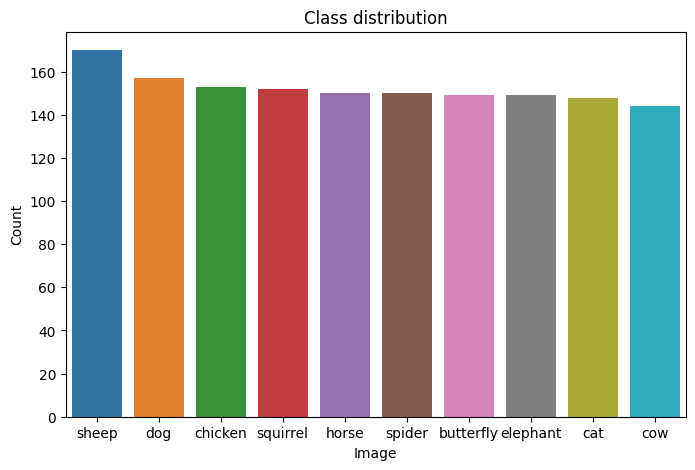

In [ ]:
show_plot_class_distribution(class_distribution_df, CLASS_COLUMN, IMAGE_COUNT_COLUMN, "Class distribution", figure_size=(8, 5))

In [ ]:
show_plot_class_distribution_pie(class_distribution_df, CLASS_COLUMN, IMAGE_COUNT_COLUMN, title="Data Distribution of animal dataset")

## Conclusion

The dataset is only slightly unbalanced